# Regressão Linear Simples - Trabalho

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


In [24]:
import csv
import random
import matplotlib.pyplot as plt
from math import sqrt


def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset


def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar

# Calculate coefficients
def coefficients(dataset):
      x = [row[0] for row in dataset]
      y = [row[1] for row in dataset]
      x_mean, y_mean = mean(x), mean(y)
      b1 = (covariance(x, x_mean, y, y_mean) / variance(x, x_mean))
      b0 = y_mean - b1 * x_mean
      return [b0, b1]

def simple_linear_regression(train, test):
  predictions = list()
  b0, b1 = coefficients(train)
  for row in test:
    ypred = b0 + b1 * row[0]
    predictions.append(ypred)
  return predictions


# Calculate root mean squared error
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(train, test, algorithm):
  #test_set = list()
  #for row in dataset:
  #  row_copy = list(row)
  #  row_copy[-1] = None
  #  test_set.append(row_copy)
  predicted = algorithm(train, test)
  print('Predição:',predicted)
  actual = [row[-1] for row in test]
  rmse = rmse_metric(actual, predicted)
  return rmse


dataset = loadCsv('insurance.csv')
train, test = splitDataset(dataset, 0.6)
predictions = simple_linear_regression(train, test)
rmse = evaluate_algorithm(train, test, simple_linear_regression)
print('\nRMSE:', rmse)


Predição: [379.7028802194452, 433.6598349976991, 150.3858224118663, 93.05655795997158, 62.70577089720378, 49.21653220264031, 32.35498383443598, 177.36429980099325, 39.09960318171771, 22.23805481351338, 93.05655795997158, 25.610364487154243, 39.09960318171771, 35.72729350807684, 89.68424828633071, 52.58884187628118, 221.2043255583245, 140.26889339094373, 153.75813208550716, 59.333461223562914, 66.07808057084465, 116.66272567545765, 96.42886763361244, 45.844222528999445, 194.2258481691976, 103.17348698089418]

RMSE: 41.247017237442236


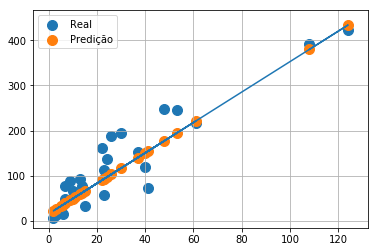

In [25]:
x = [row[0] for row in test]
y = [row[1] for row in test]
plt.scatter(x,y,alpha=1,s=100,label="Real")
plt.scatter(x,predictions,alpha=1,s=100,label="Predição")
plt.plot(x,predictions)
plt.legend()
plt.grid(True)
plt.show()